# Walmart Sales Forecasting using Time Series Modelling

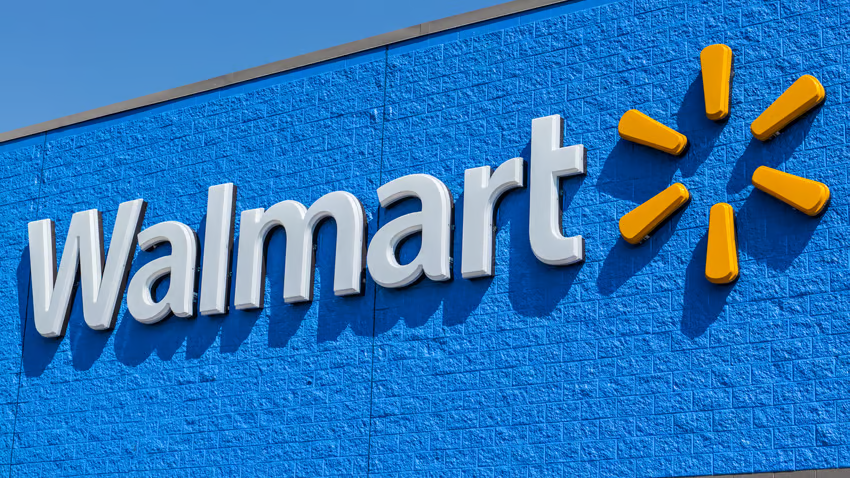

# Background
Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

# Business Objectives
Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store.


# Importing Necessary Libraries and Data

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00


In [3]:
df_store = pd.read_csv('stores.csv') #store data
df_train = pd.read_csv('train.csv') # train set
df_test = pd.read_csv('test.csv') # test set
df_features = pd.read_csv('features.csv') #external information

In [4]:
pd.options.display.max_columns=20 # to see columns

In [5]:
df_store.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [7]:
df_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [8]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

In [9]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df.head() # last ready data set

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [10]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (421570, 16)


# Store & Department Numbers

In [11]:
df['Store'].nunique() # number of different values

45

In [12]:
df['Dept'].nunique() # number of different values

81

Now, we will look at the *average weekly sales* for each store and each department to see if there is any weird values or not. There are **45** stores and **81** departments for stores.

In [13]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept             1              2             3             4             5   \
Store                                                                          
1      22513.322937   46102.090420  13150.478042  36964.154476  24257.941119   
2      30777.980769   65912.922517  17476.563357  45607.666573  30555.315315   
3       7328.621049   16841.775664   5509.300769   8434.186503  11695.366573   
4      36979.940070   93639.315385  19012.491678  56603.400140  45668.406783   
5       9774.553077   12317.953287   4101.085175   9860.806783   6699.202238   
6      23867.553776   50269.437273  16806.638811  34187.366503  34465.307622   
7       9542.801259   22603.690769   8633.536923  14950.518601  13860.350490   
8      14789.827343   35729.821748  10683.305105  21089.309301  19838.849231   
9      11846.558252   24969.477413   7497.356783  17165.947762  19282.746014   
10     39925.138951  109795.291469  32086.181469  48579.826364  58373.460280   
11     18860.911958   57114.326224  17628.778671  28837.744545  36663.363916   
12     17330.087622   74494.846224  17535.251678  26673.788182  27756.204615   
13     47020.455455   76339.960000  26116.623706  42563.275455  56786.934755   
14     30611.783357   77704.857972  19418.273986  52936.323287  33468.325035   
15     13845.747832   26317.410769  10470.811958  13082.172448  16465.706993   
16     11352.479371   23549.144965   7635.427273  14748.078112  13494.538671   
17     22801.609161   42231.844406  19278.955035  23961.357273  27082.325594   
18     21988.356224   63665.139510  16392.980490  26775.207203  22933.954965   
19     21504.029161   50841.072937  18414.224476  31365.545315  28759.223846   
20     40545.473217   78251.249930  15490.971259  51456.376643  41647.786503   
21     14950.049231   47780.599161  14607.126923  19354.728042  16090.874545   
22     21493.271119   53361.851888  13150.979510  32104.132378  23187.335105   
23     33186.460559   70522.580140  19912.564755  27324.303077  36895.869021   
24     18859.023357   40797.169301  11825.589021  29245.357552  29178.058811   
25     20145.897483   36871.310559  11788.130979  20351.455455  12422.996434   
26     19402.762937   27398.030979   7357.400769  24498.113846  17589.532587   
27     30437.976224   79001.049161  20226.734615  43596.933916  28059.038252   
28     20180.453986   57751.274336  12562.223287  27980.817203  28221.618392   
29     15504.699580   25181.662727   7995.955804  14326.216224  12931.821259   
30      9788.376643   12974.464476    739.981888  13216.100909    405.565944   
31     17356.652448   58512.131538  10616.675944  34848.899231  18715.630769   
32     22852.639510   50323.497343  15472.540140  28137.154965  20748.371888   
33      2379.086573    7471.425105    283.950140   6107.616014    112.728310   
34     19947.573077   34916.225874   8377.376434  19791.509021  21633.900559   
35     17082.647902   45578.456224  14308.382797  19495.631119  24858.433706   
36      2239.227413   13416.025664    381.324266   9873.505105    314.753982   
37     11024.235874   16511.446224   1297.862028  17614.013636   1137.631189   
38      6923.538531   10986.172657    498.700210  10669.501329    397.418322   
39     21925.021189   67338.429371  20569.701608  44807.515105  24043.436783   
40     18794.578811   26702.705175   6489.030350  24386.750559  17689.671678   
41     23205.259930   48349.828951  17021.833357  30538.574895  25513.943776   
42     10375.148392   15976.902448    814.451189  14885.264755   1052.296783   
43      7549.109021   20722.851469    999.648881  18227.382168    575.417326   
44      8049.992308    9377.273007    571.016713   7403.959580    960.670490   
45     17745.916014   35800.912448   9508.014965  24229.873147  16107.063077   

Dept             6             7             8             9             10  \
Store                                                                         
1       4801.780140  24566.487413  35718.257622  28062.052238  31033.386364   
2 

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, we will change this values.

In [14]:
df.loc[df['Weekly_Sales']<=0]

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
188         1    47  2010-02-19       -863.00      False        39.93   
406         1    47  2010-03-12       -698.00      False        57.79   
2549        1    47  2010-10-08        -58.00      False        63.93   
3632        1    54  2011-01-21        -50.00      False        44.04   
4132        1    47  2011-03-11          0.00      False        53.56   
...       ...   ...         ...           ...        ...          ...   
420066     45    49  2012-05-25         -4.97      False        67.21   
420403     45    49  2012-06-29        -34.00      False        75.22   
420736     45    49  2012-08-03         -1.91      False        76.58   
421007     45    54  2012-08-31          0.00      False        75.09   
421142     45    49  2012-09-14         -6.83      False        67.87   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
188          2.514        NaN        NaN        NaN        NaN        NaN   
406          2.667        NaN        NaN        NaN        NaN        NaN   
2549         2.633        NaN        NaN        NaN        NaN        NaN   
3632         3.016        NaN        NaN        NaN        NaN        NaN   
4132         3.459        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
420066       3.798    5370.39        NaN     361.22    1287.62    2461.81   
420403       3.506    3291.36     425.60        NaN     314.88    2255.34   
420736       3.654   24853.05      39.56      17.96   11142.69    2768.32   
421007       3.867   23641.30       6.00      92.93    6988.31    3992.13   
421142       3.948   11407.95        NaN       4.30    3421.72    5268.92   

               CPI  Unemployment Type    Size  
188     211.289143         8.106    A  151315  
406     211.380643         8.106    A  151315  
2549    211.746754         7.838    A  151315  
3632    211.827234         7.742    A  151315  
4132    214.111056         7.742    A  151315  
...            ...           ...  ...     ...  
420066  191.002810         8.567    B  118221  
420403  191.099246         8.567    B  118221  
420736  191.164090         8.684    B  118221  
421007  191.461281         8.684    B  118221  
421142  191.699850         8.684    B  118221  

[1358 rows x 16 columns]

**1358** rows in 421570 rows means **0.3%**, so we can delete and ignore these rows which contains wrong sales values.

In [15]:
df = df.loc[df['Weekly_Sales'] > 0]
print("Shape of the new dataset: ",df.shape) # new data shape


Shape of the new dataset:  (420212, 16)


# Date Analysis

In [16]:
df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

Our data is from **5th of February 2010** to **26th of October 2012.**

**IsHoliday column**

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

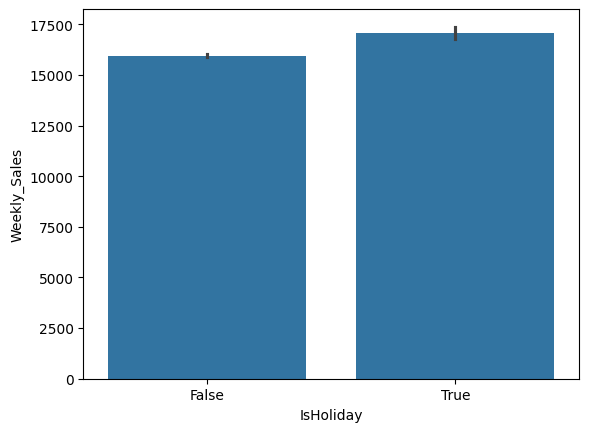

In [17]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [18]:
# Weeks when there is a holiday
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [19]:
# Weeks when there is not a holiday
df_not_holiday = df.loc[df['IsHoliday']==False]
print("Number of weeks when there is not a holiday: ", df_not_holiday['Date'].nunique())

Number of weeks when there is not a holiday:  133


All holidays are not in the data. There are **4** holiday values such as;

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

**Labor Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

**Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

**Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are *significantly higher* than not-holiday days. In train data, there are **133 weeks** for non-holiday and **10 weeks** for holiday.

To individually see the impact and differences between holiday types, we created new columns for 4 types of holidays and filled them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [20]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

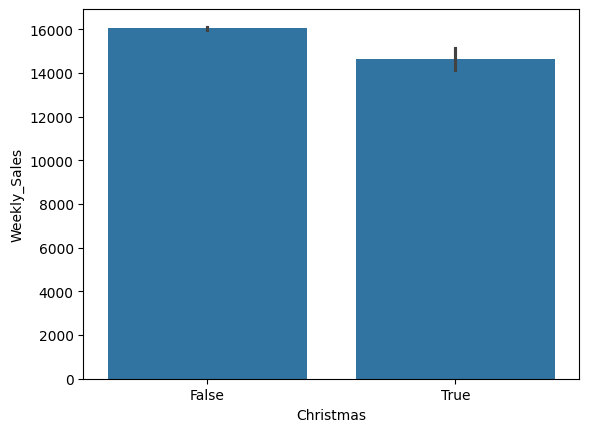

In [21]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

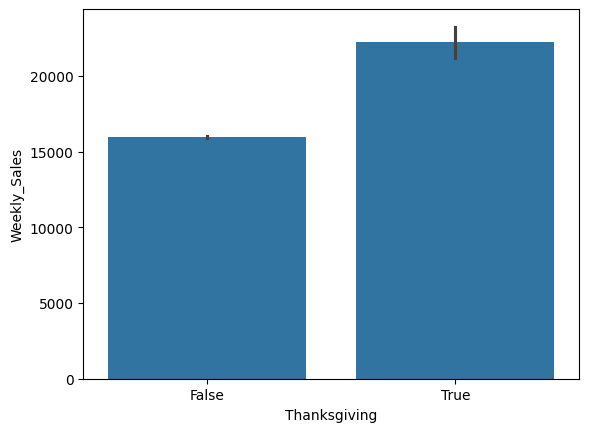

In [22]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

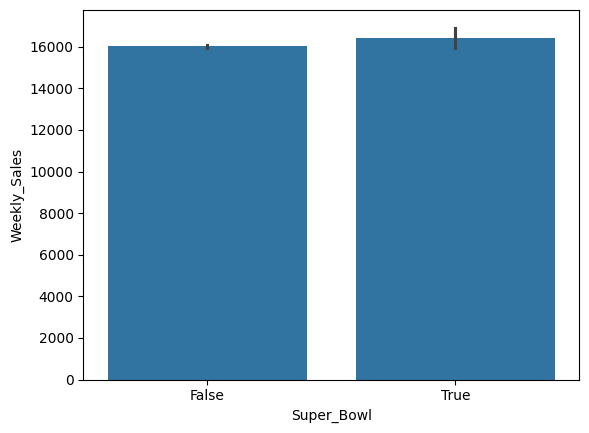

In [23]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

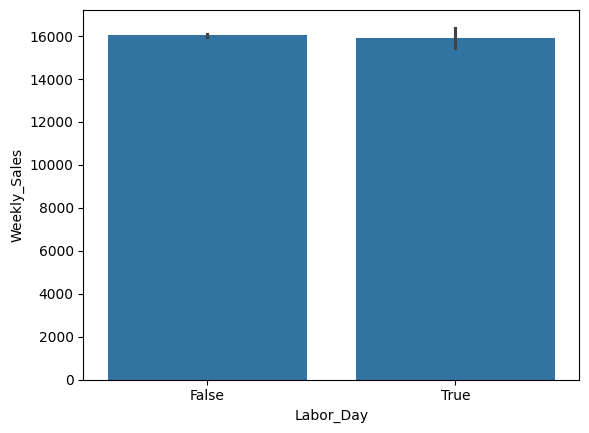

In [24]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

We can see that Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the **Thanksgiving**.

**Type Effect on Holidays**

There are three different store types in the data as A, B and C.

In [25]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [26]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [27]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [28]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl


Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

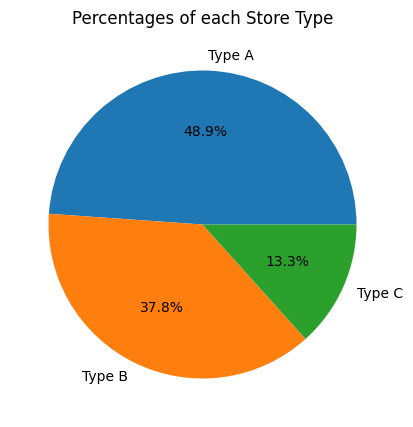

In [29]:
plt.figure(figsize=(5,5))
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 10}) #bigger percentage labels
plt.title("Percentages of each Store Type")
plt.show()

Nearly *half* of the stores are belongs to **Type A**.

In [30]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

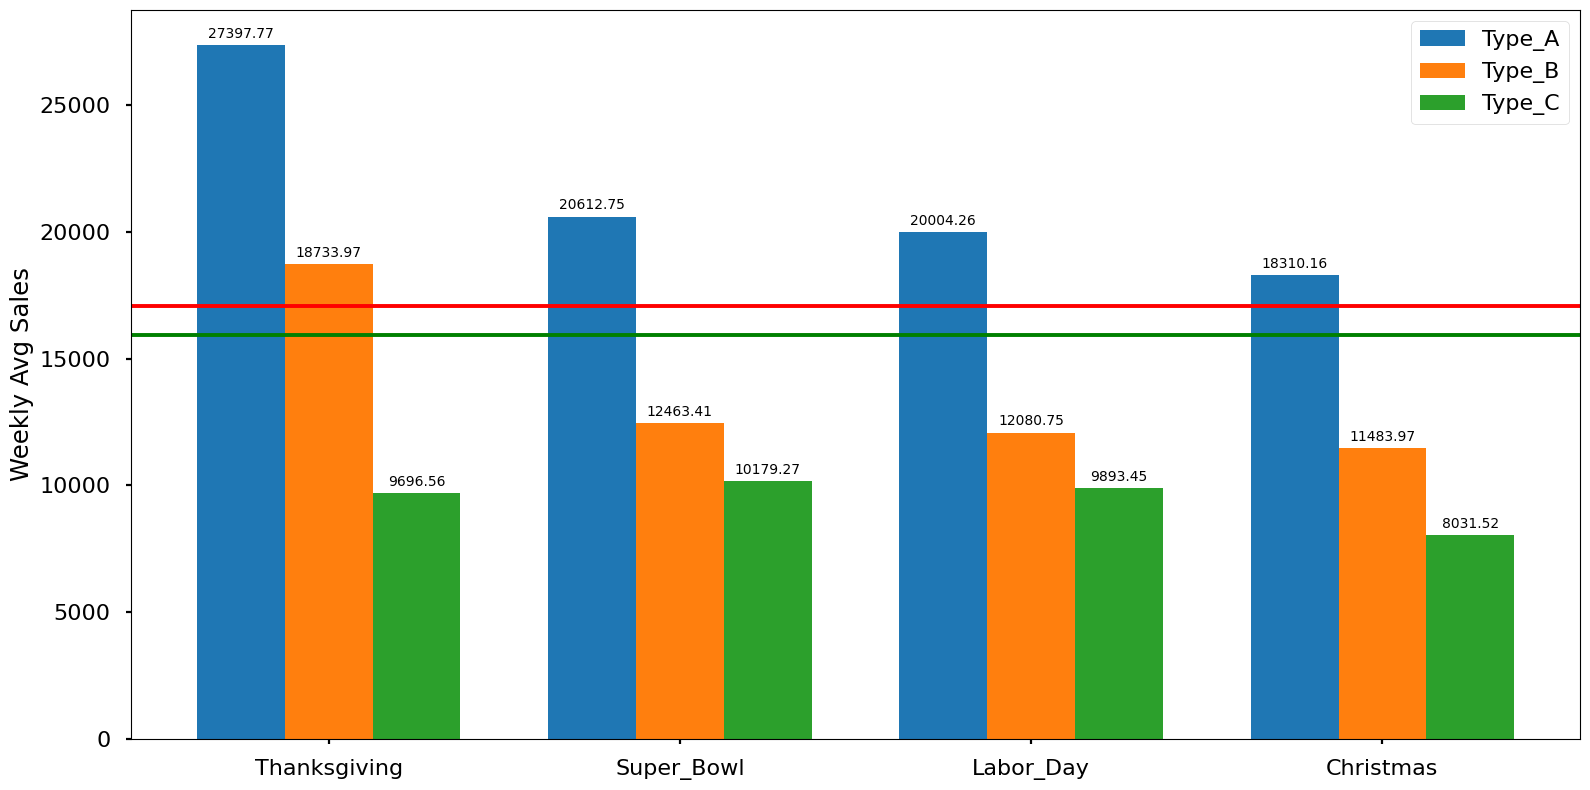

In [31]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()


It is seen from the graph that, highest sales average is in the **Thanksgiving week** between holidays. And, for all holidays **Type A** stores has the highest sales.

In [32]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
90645      10    72  2010-11-26     693099.36       True        55.33   
337053     35    72  2011-11-25     649770.18       True        47.88   
94393      10    72  2011-11-25     630999.19       True        60.68   
333594     35    72  2010-11-26     627962.93       True        46.67   
131088     14    72  2010-11-26     474330.10       True        46.15   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
90645        3.162        NaN        NaN        NaN        NaN        NaN   
337053       3.492    1333.24        NaN   58563.24      20.97    6386.86   
94393        3.760     174.72      329.0  141630.61      79.00    1009.98   
333594       3.039        NaN        NaN        NaN        NaN        NaN   
131088       3.039        NaN        NaN        NaN        NaN        NaN   

               CPI  Unemployment Type    Size Super_Bowl Labor_Day  \
90645   126.669267         9.003    B  126512      False     False   
337053  140.421786         8.745    B  103681      False     False   
94393   129.836400         7.874    B  126512      False     False   
333594  136.689571         8.763    B  103681      False     False   
131088  182.783277         8.724    A  200898      False     False   

       Thanksgiving Christmas  
90645          True     False  
337053         True     False  
94393          True     False  
333594         True     False  
131088         True     False

The top 5 highest weekly sales also belongs to **Thanksgiving** weeks.

**Size-Type Relation**

In [33]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

count       mean       std      min        25%       50%       75%  \
Type                                                                       
A      22.0  177247.73  49392.62  39690.0  155840.75  202406.0  203819.0   
B      17.0  101190.71  32371.14  34875.0   93188.00  114533.0  123737.0   
C       6.0   40541.67   1304.15  39690.0   39745.00   39910.0   40774.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

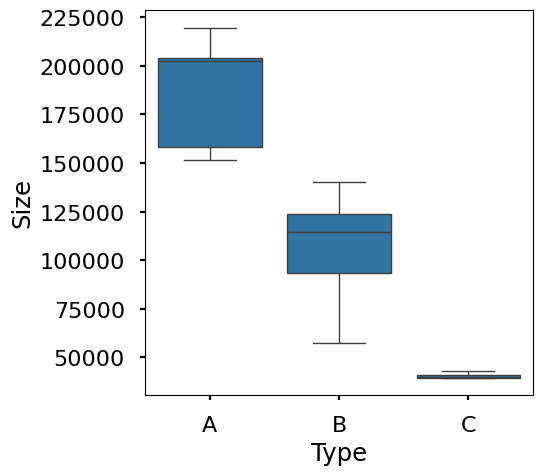

In [34]:
plt.figure(figsize=(5,5)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales. And, Walmart classify stores according to their sizes according to graph. After the smallest size value of Type A, Type B begins. After the smallest size value of Type B, Type C begins.

**Markdown Columns**

Walmart gave markdown columns to see the effect if markdowns on sales. When we checked the columns, there are many NaN values for markdowns. We decided to change them with 0, because if there is markdown in the row, it is shown with numbers. So, if we write 0, it shows there is no markdown at that date.

In [35]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [36]:
df = df.fillna(0) # filling null's with 0
df.isna().sum() # last null check

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

**Sales Analysis**

Text(0.5, 1.0, 'Weekly Sales by Department')

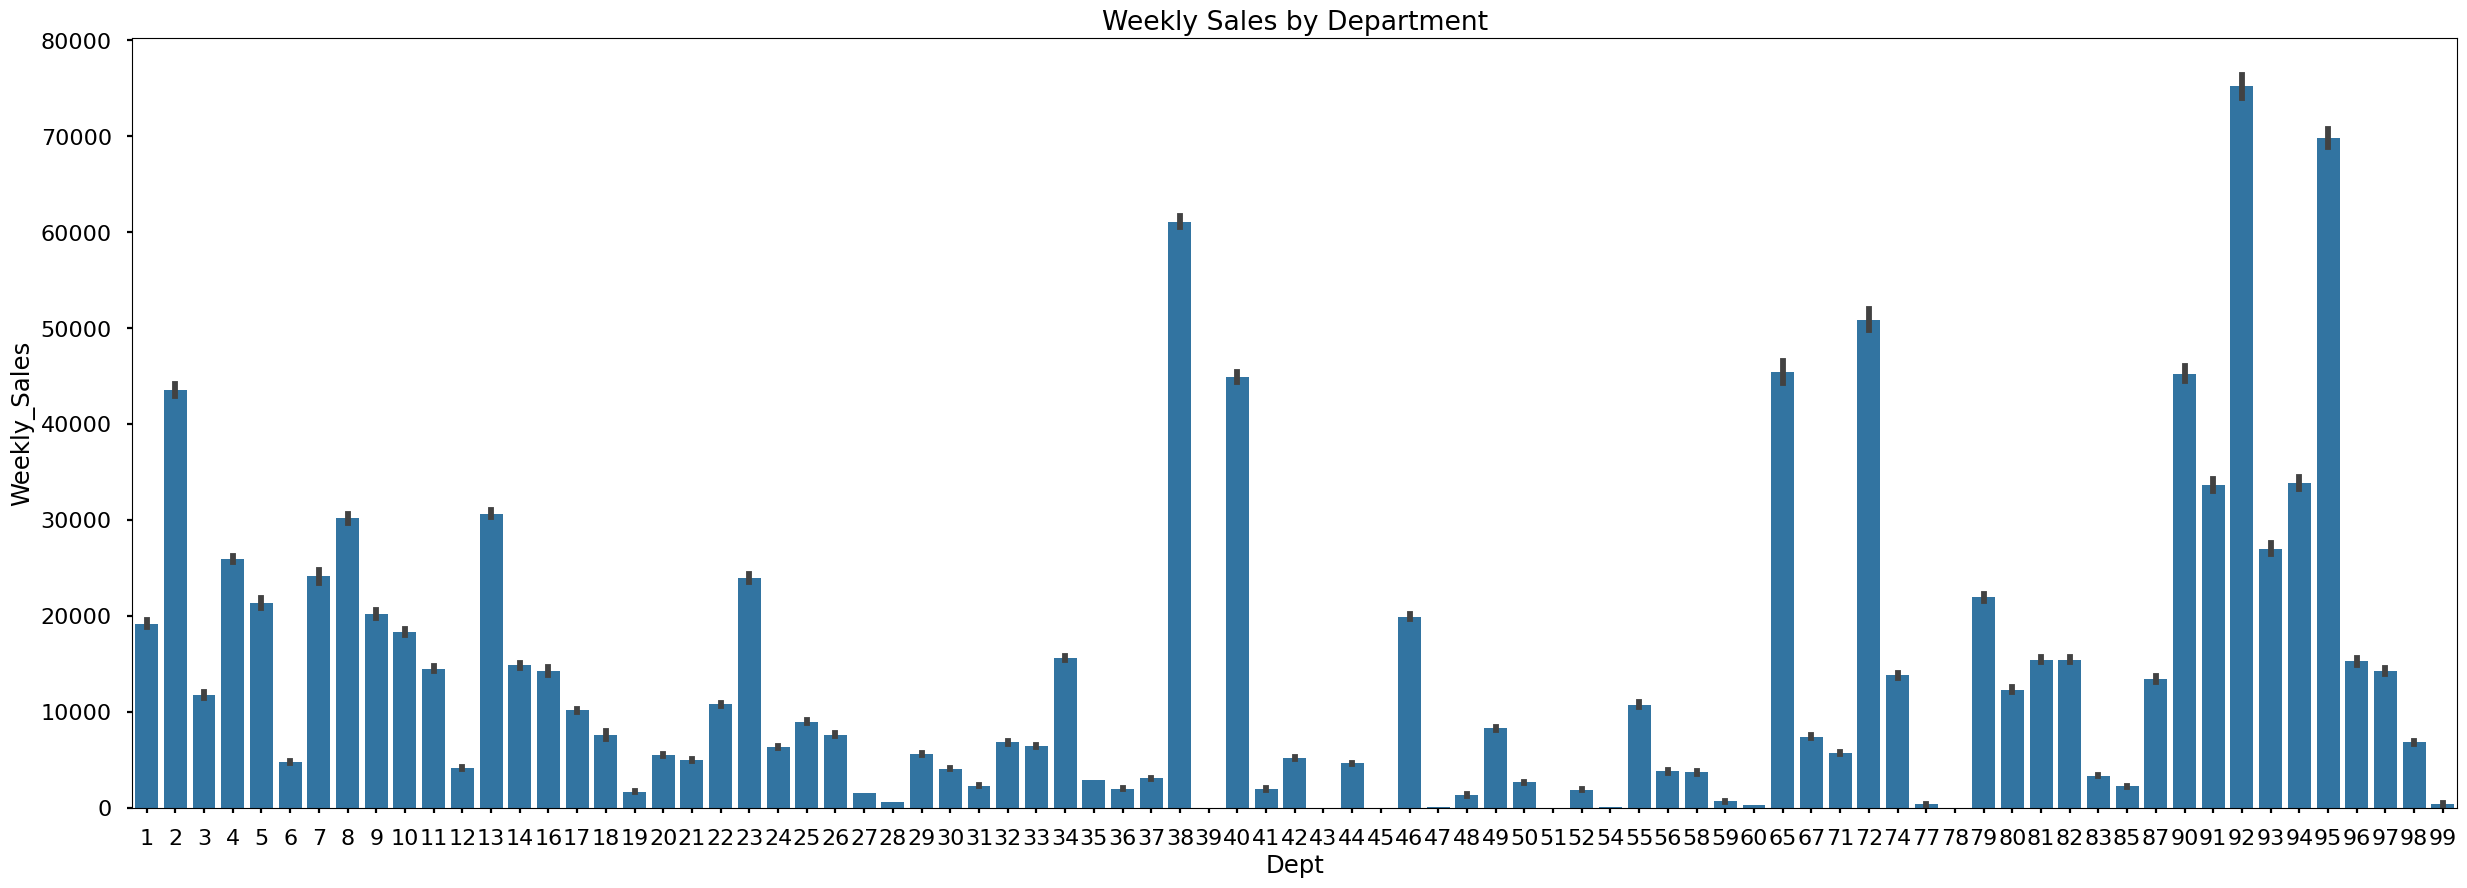

In [37]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Department')

*It is seen that department **92** has highest mean sales.*

Text(0.5, 1.0, 'Weekly Sales by Store')

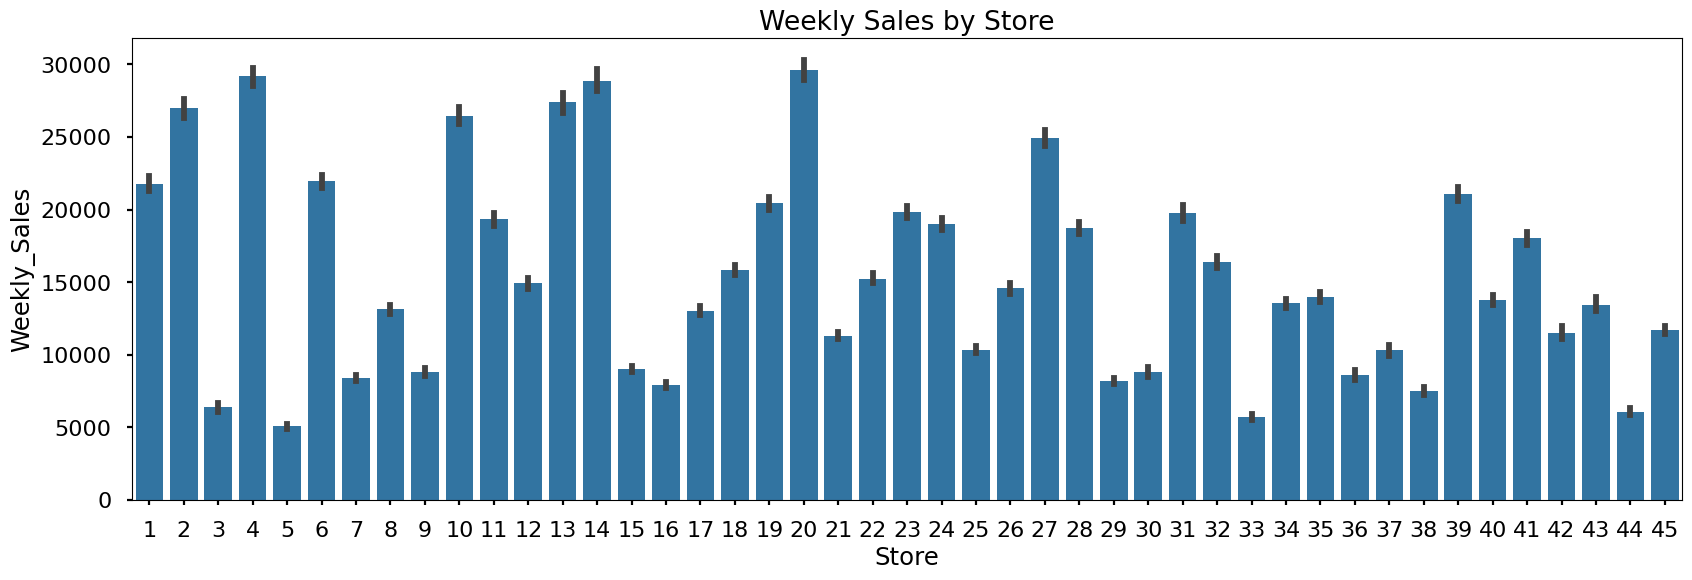

In [38]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store')

*It is seen that average store **20** is the best and 4 and 14 following it.*

**Changing Date to Datetime and Creating New Columns**

In [39]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [40]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

<Figure size 800x400 with 0 Axes>

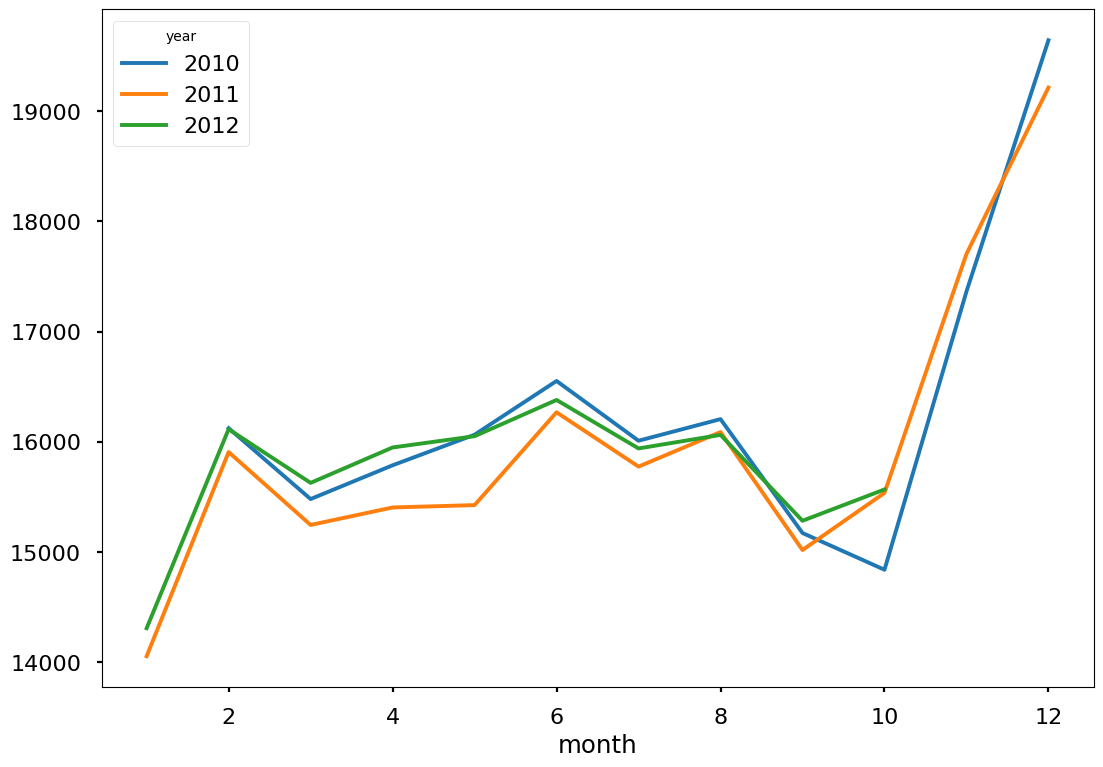

In [41]:
plt.figure(figsize=(8,4))
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

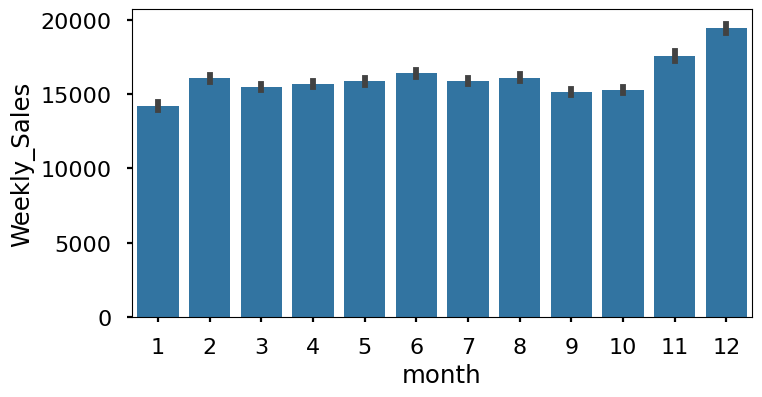

In [42]:
plt.figure(figsize=(8,4))
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)


The best sales can be seen in **December** and **November**, as expected. The highest values are belongs to Thankgiving holiday but when we take average it is obvious that December has the best value.

In [43]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

<Axes: xlabel='week'>

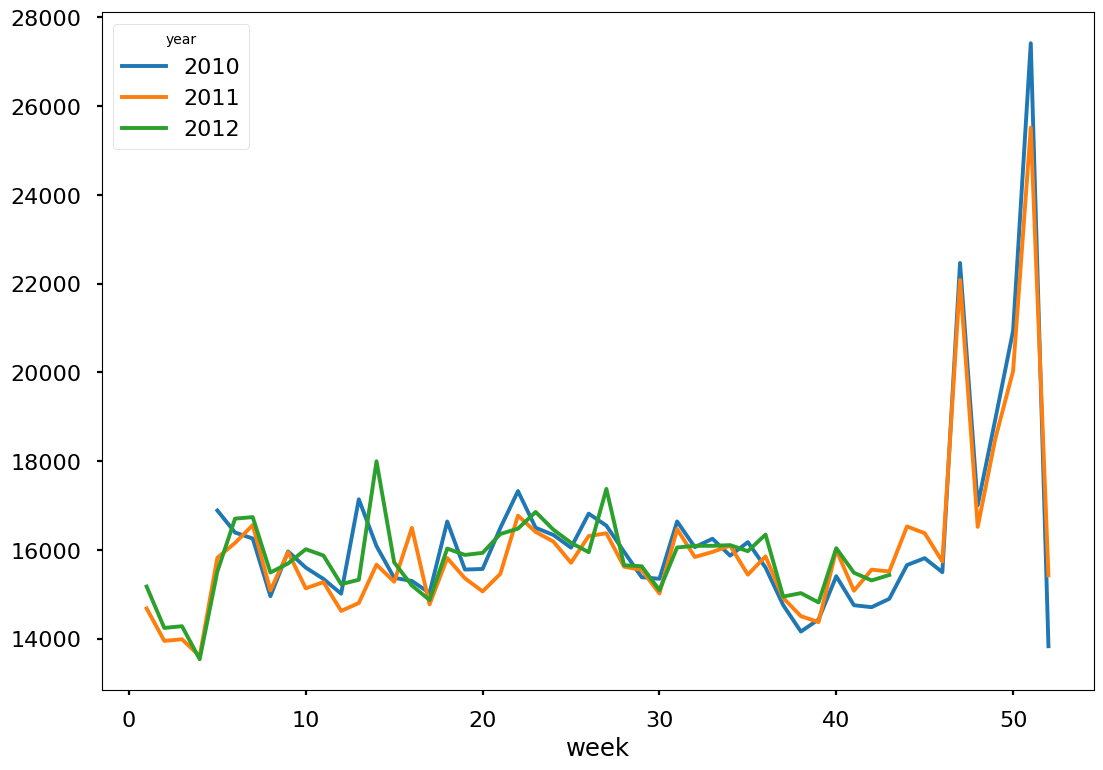

In [44]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

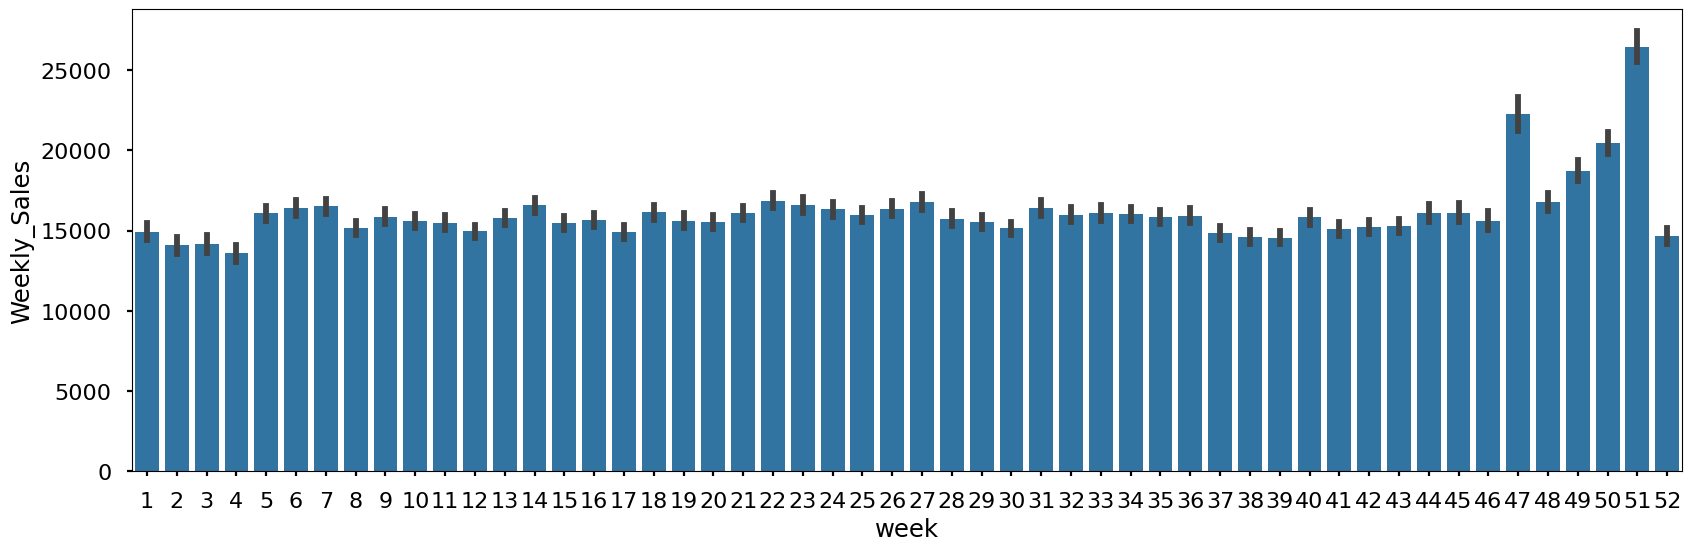

In [45]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

From graphs, it is seen that **51th** week and **47th** weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

# Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

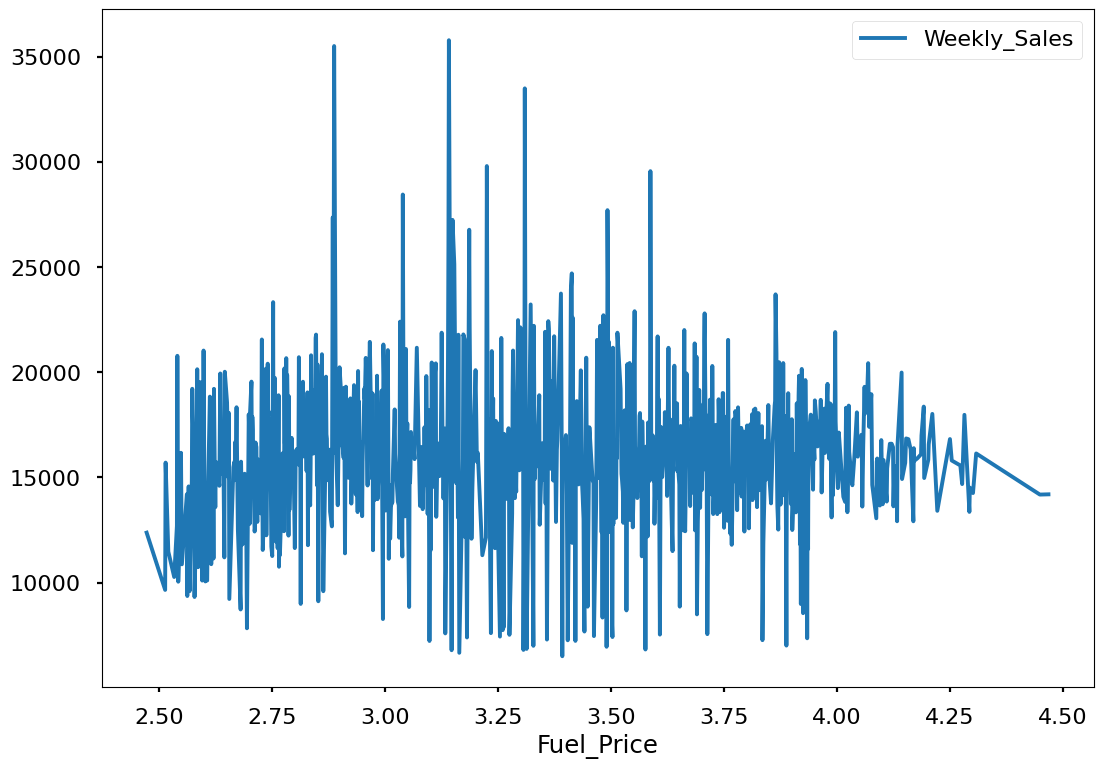

In [46]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

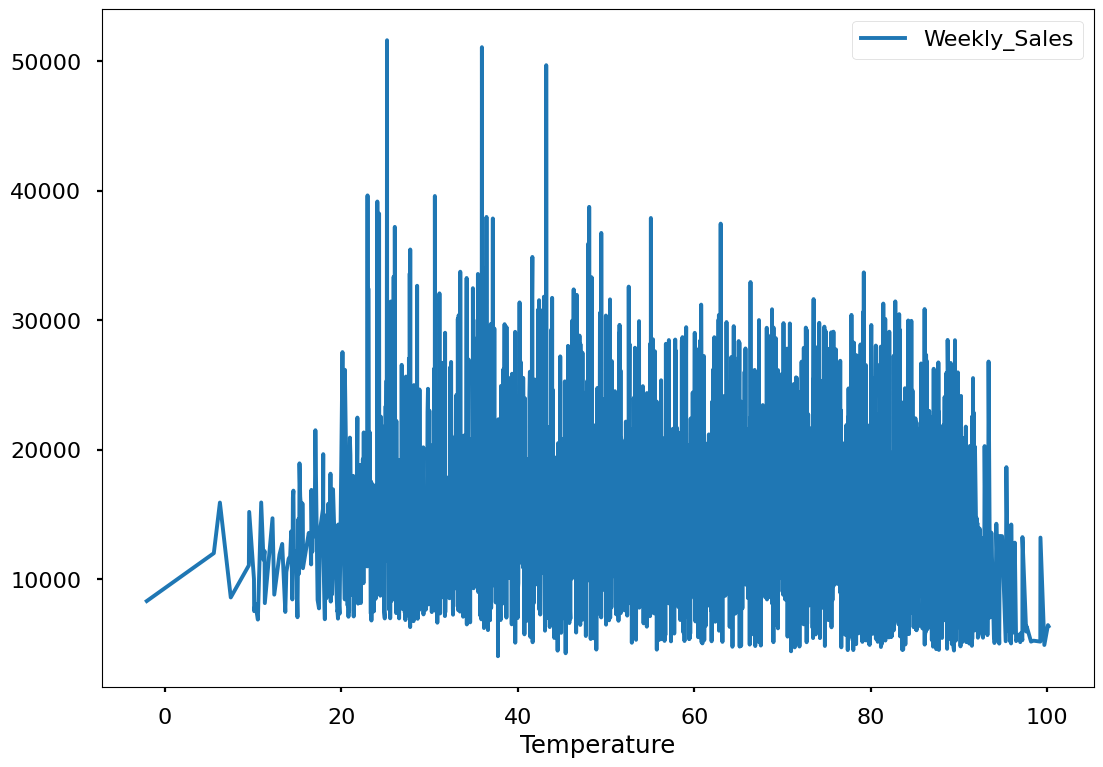

In [47]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

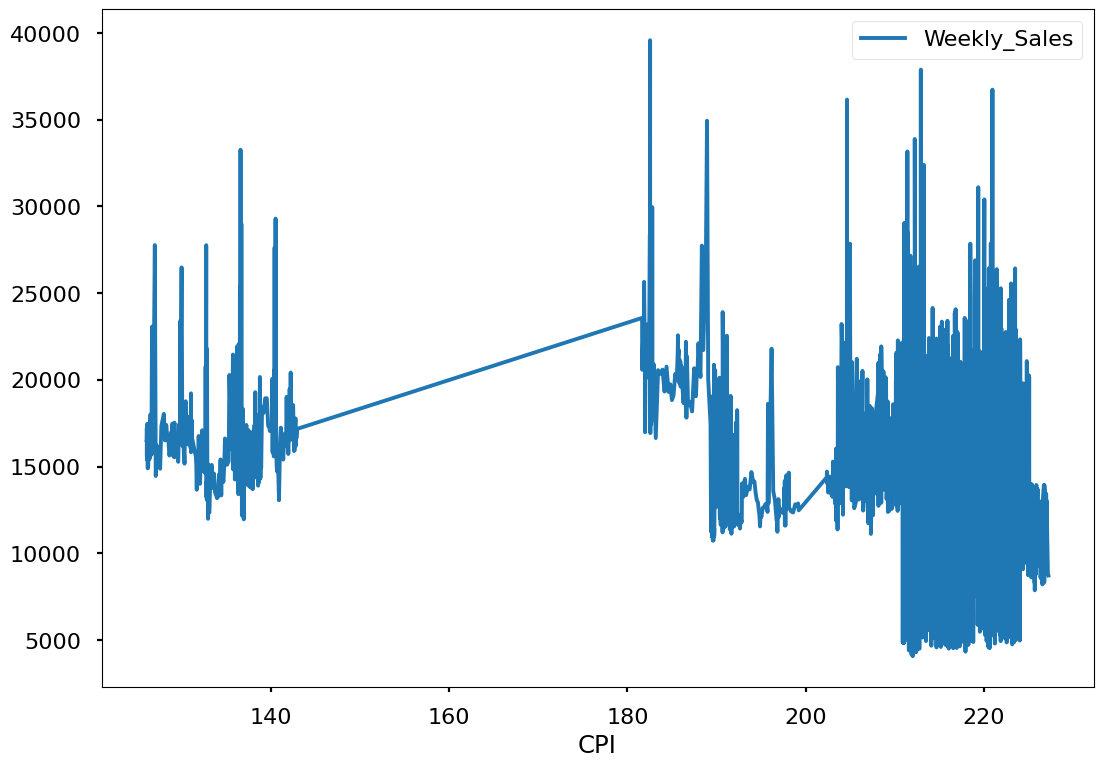

In [48]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

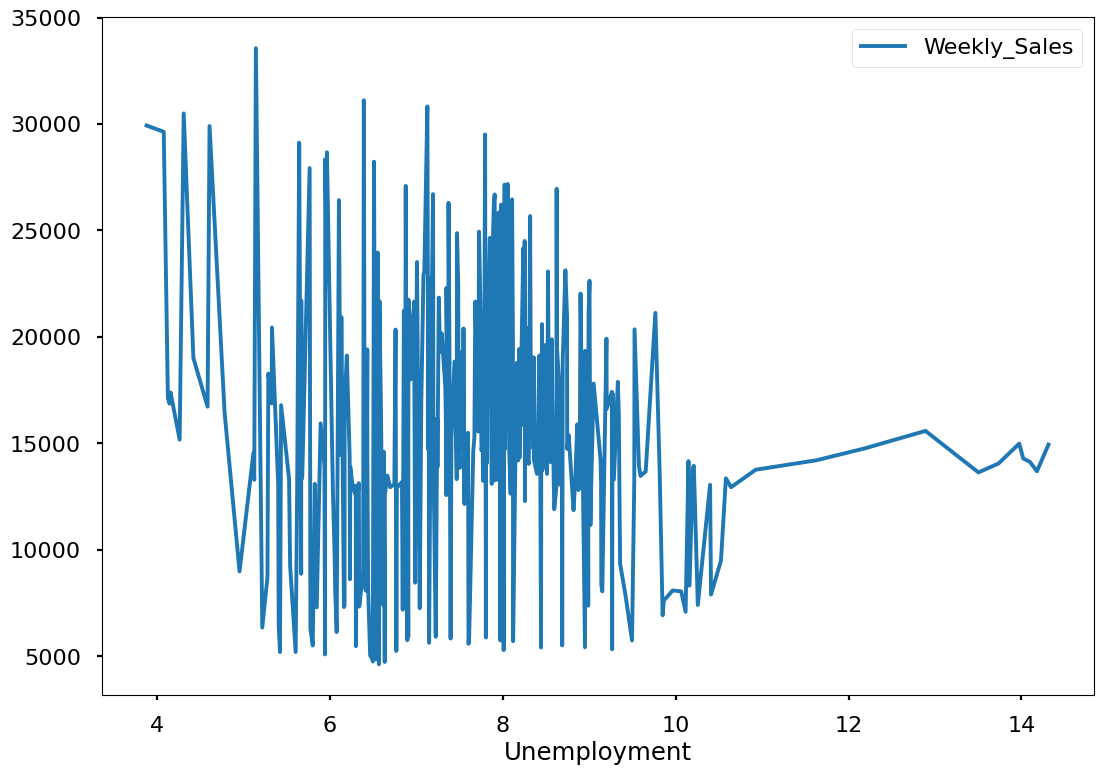

In [49]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also.

In [50]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# Time Series Model

**Plotting Sales**

In [51]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing
df.set_index('Date', inplace=True) #seting date as index

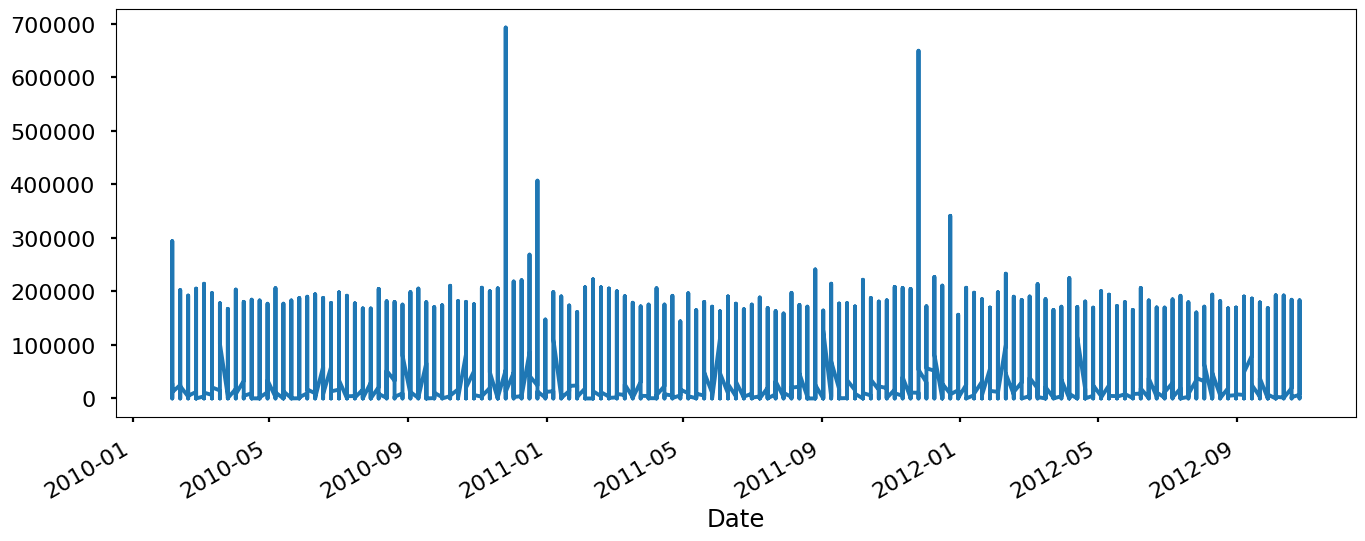

In [52]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

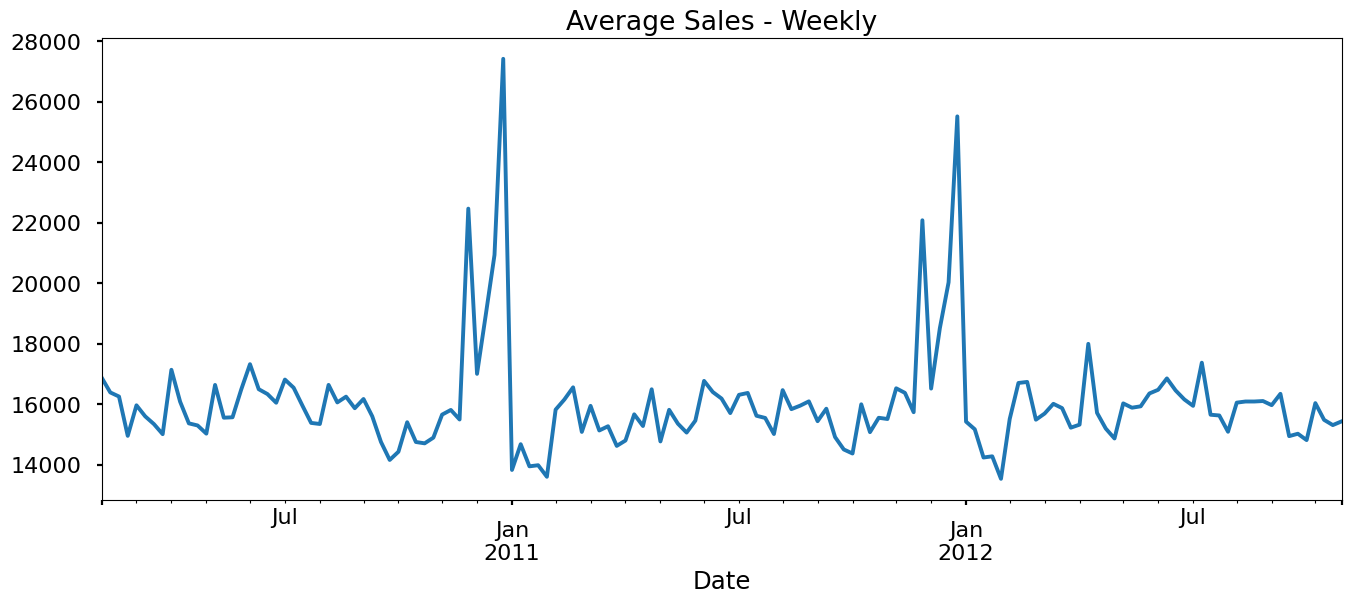

In [53]:
df_week = df.resample('W').mean() #resample data as weekly
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

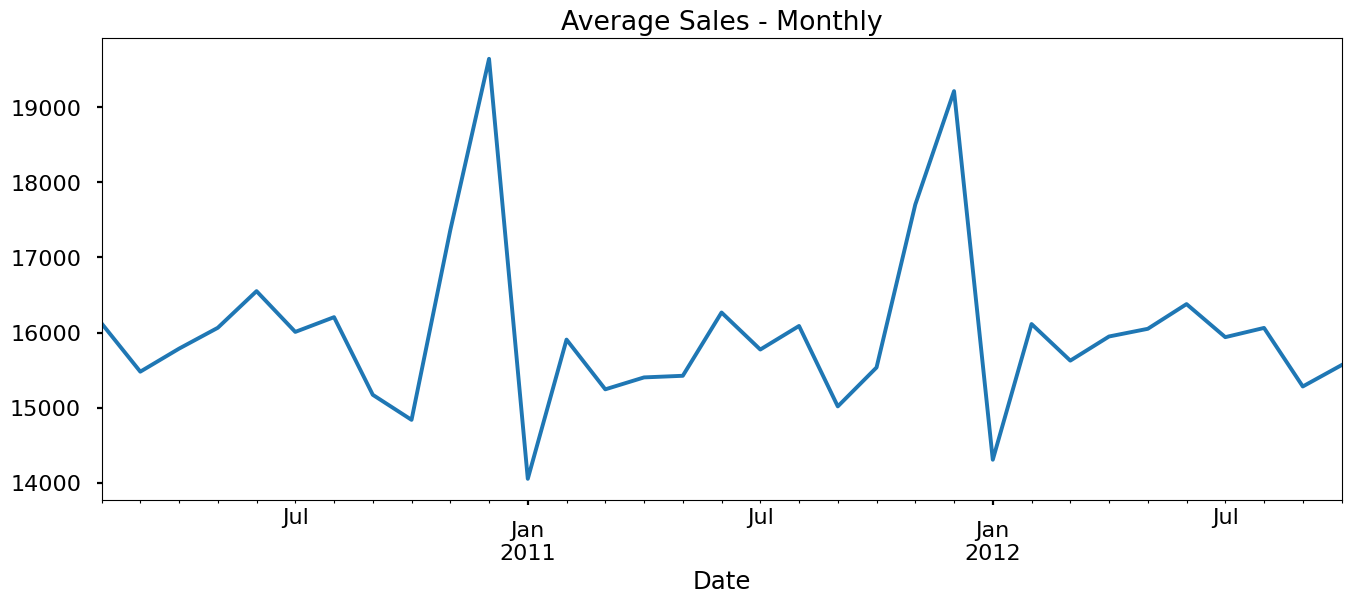

In [54]:
df_month = df.resample('MS').mean() # resampling as monthly
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [55]:
df_encoded = df.copy() # to keep original dataframe taking copy of it
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

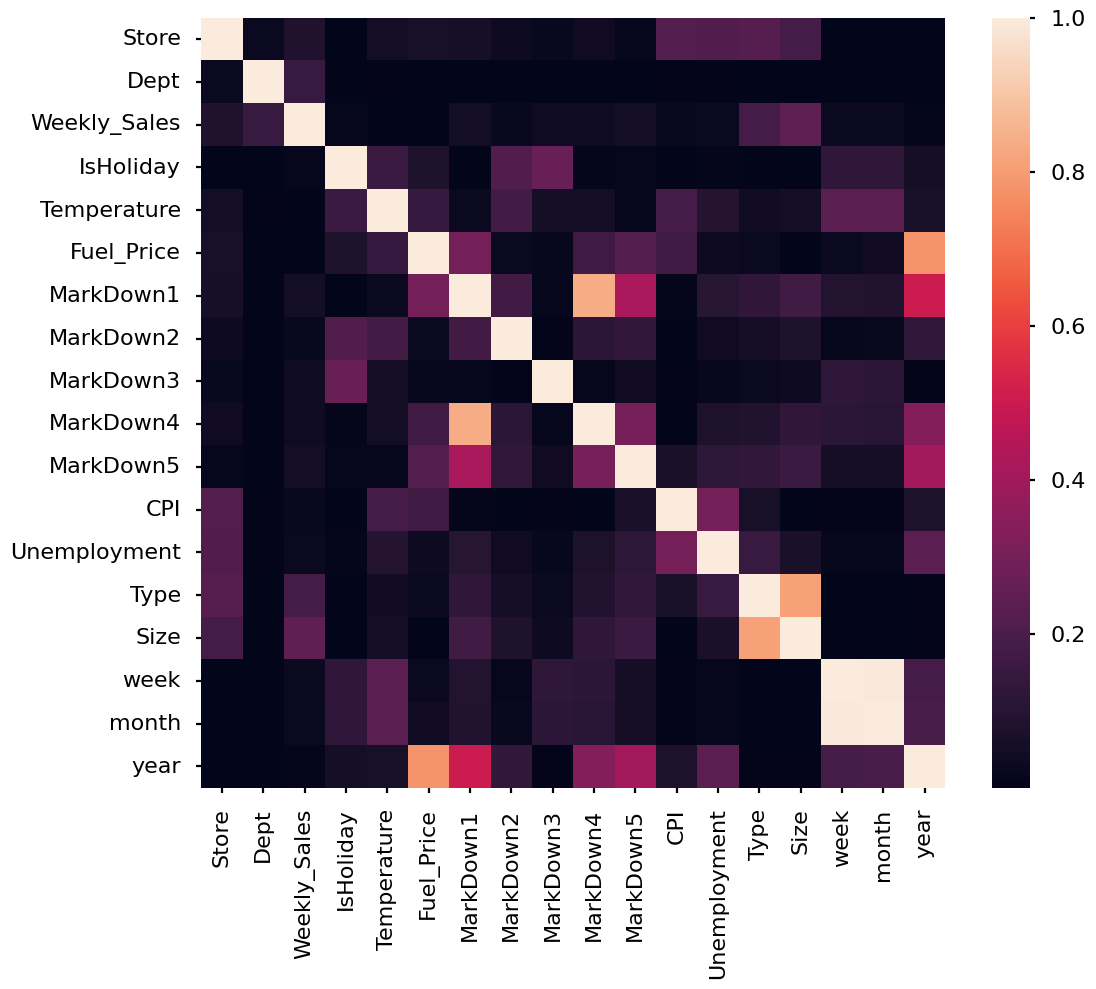

In [56]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

# Adfuller Test for Stationarity

We will check if the series is stationary using the Augmented Dickey Fuller test (ADF Test), from the statsmodels package. The reason being is that we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

In [57]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_week['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
print('p-value: %s' % result[1])

ADF Statistic: -5.927107
p-value: 2.4290492082042356e-07


In [58]:
result=adfuller(df_week['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %s' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
  print("Data is stationary")
else:
  print("non-stationary ")

ADF Statistic: -5.927107
p-value: 2.4290492082042356e-07
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Data is stationary


**2-weeks Rolling Mean and Std**

As our data is non-stationary, we will try to find more stationary version on it.

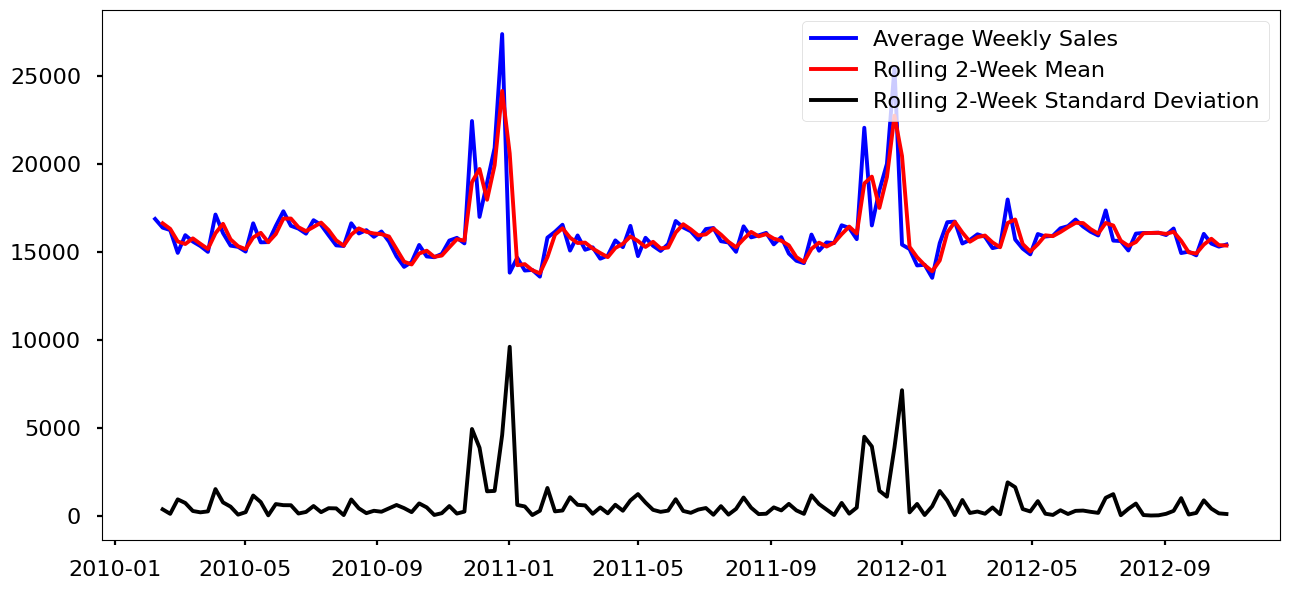

In [59]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

# Train - Test Split of Weekly Data

In [60]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


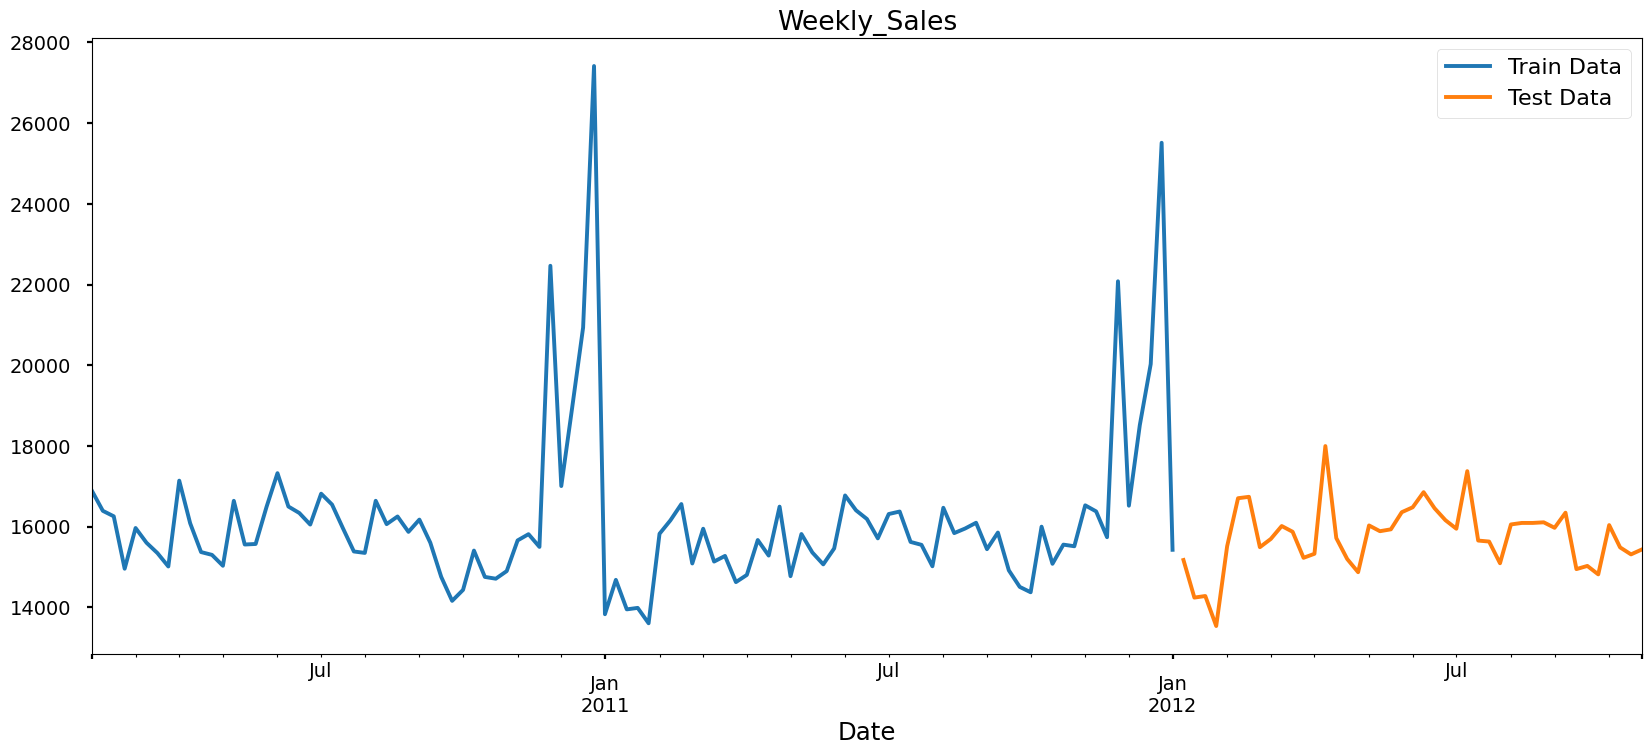

In [61]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, label="Train Data")
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, label="Test Data")
plt.legend()
plt.show()

# Decomposing Weekly Data to Observe Seasonality

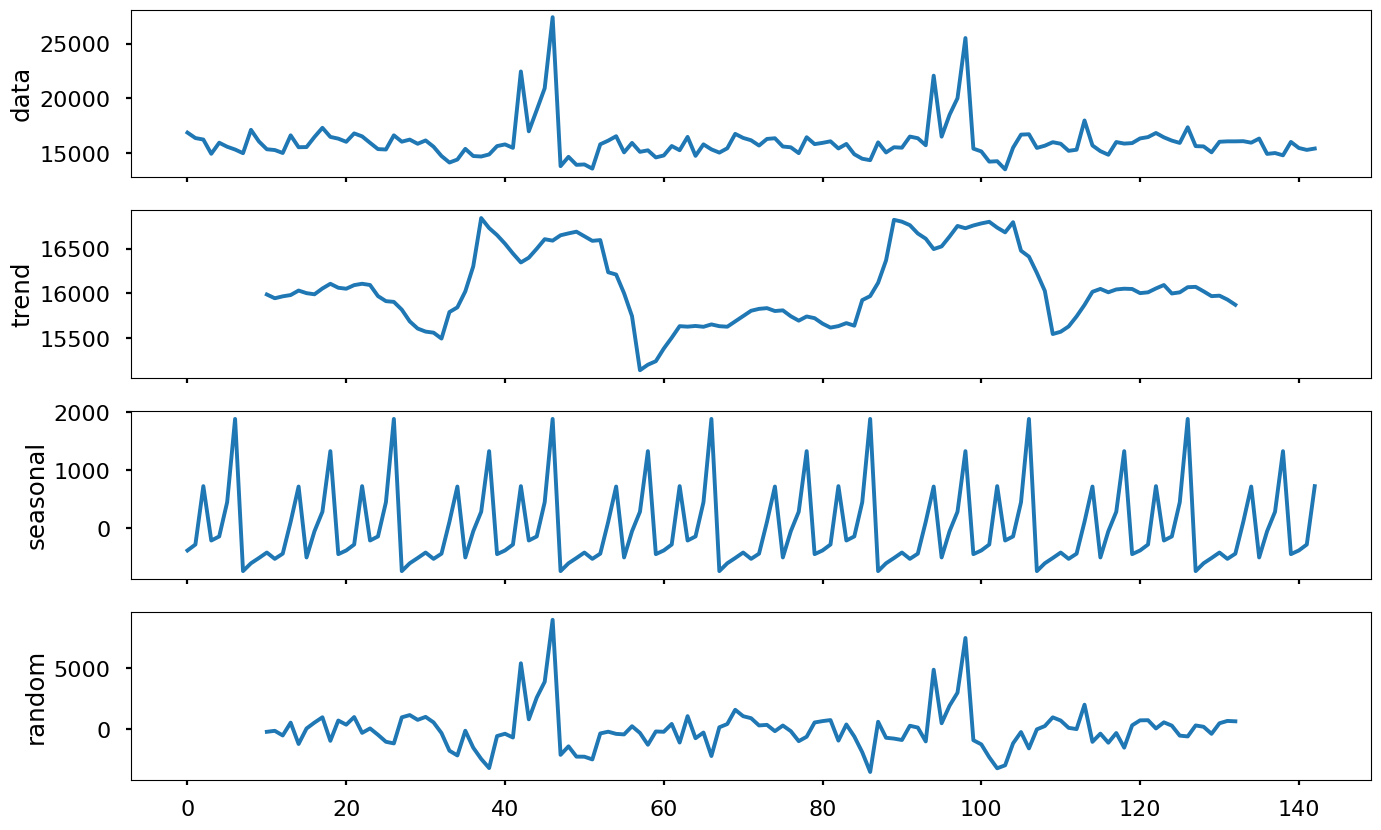

In [62]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

*From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.*

**1. Difference**

In [63]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

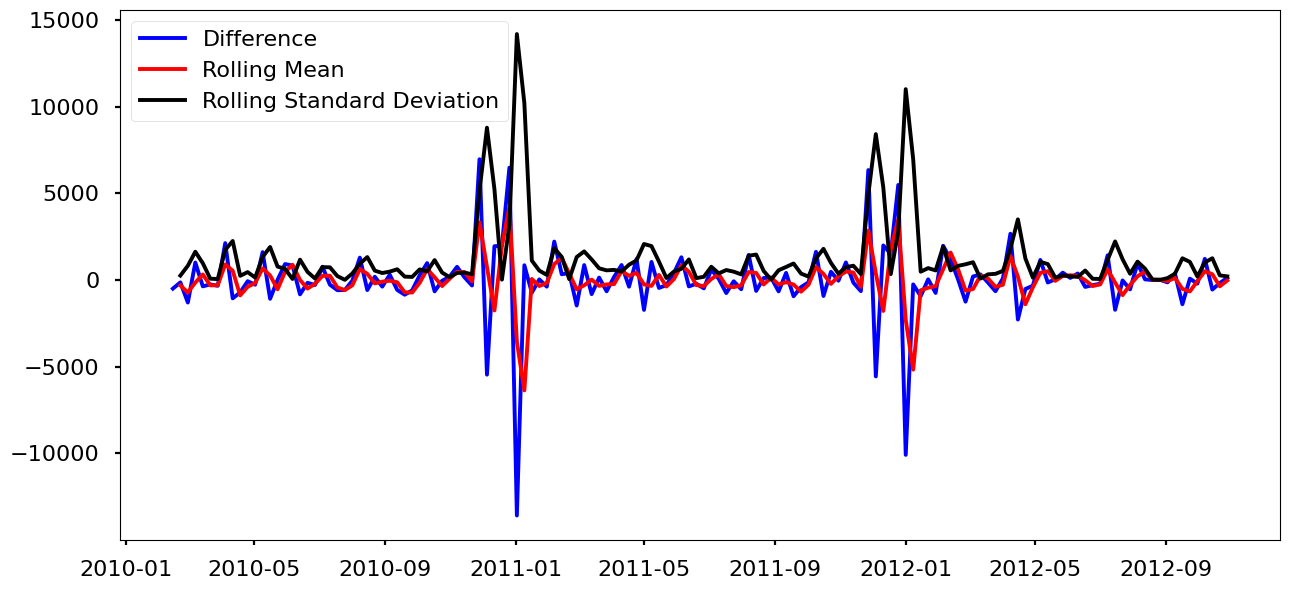

In [64]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

**2. Shift**

In [65]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

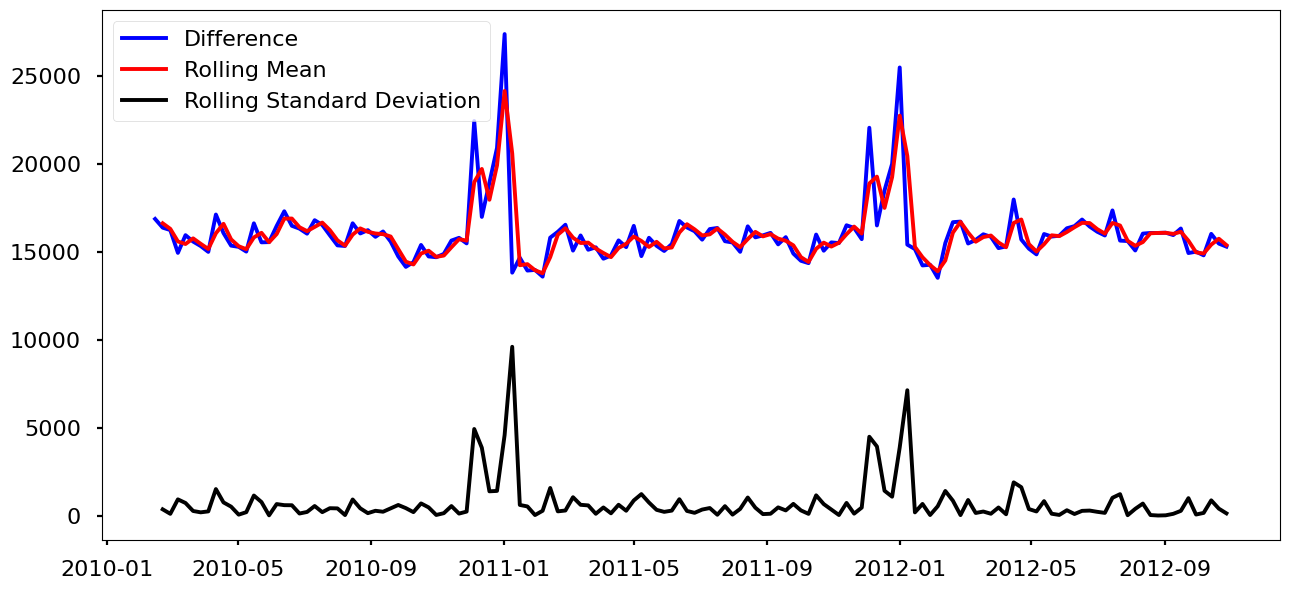

In [66]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

**3. Log**

In [67]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

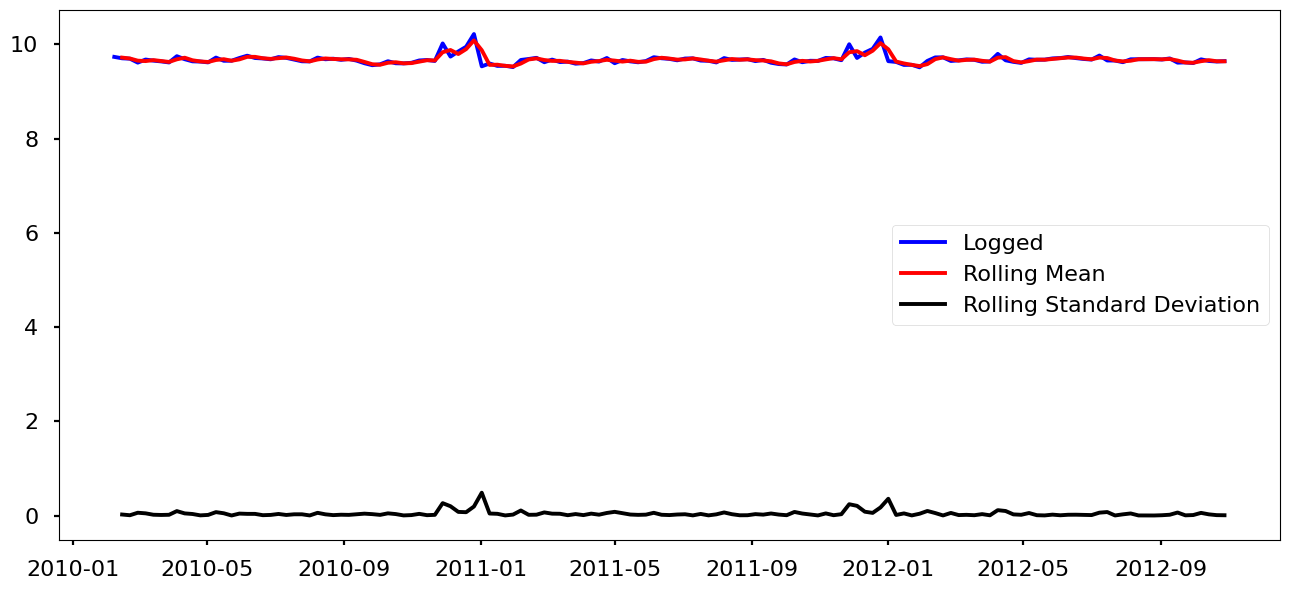

In [68]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Auto-ARIMA Model

As we saw from above graphs, differenced data gave the best results, therefore, we decided to take difference and use this data.

In [69]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [70]:
print(model_auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -884.461
Date:                Tue, 02 Apr 2024   AIC                           1782.922
Time:                        10:57:20   BIC                           1801.088
Sample:                    02-14-2010   HQIC                          1790.272
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     91.2166    477.652      0.191      0.849    -844.964    1027.397
ar.L1         -1.3324      0.109    -12.231      0.000      -1.546      -1.119
ar.L2         -1.1692      0.138     -8.482      0.0

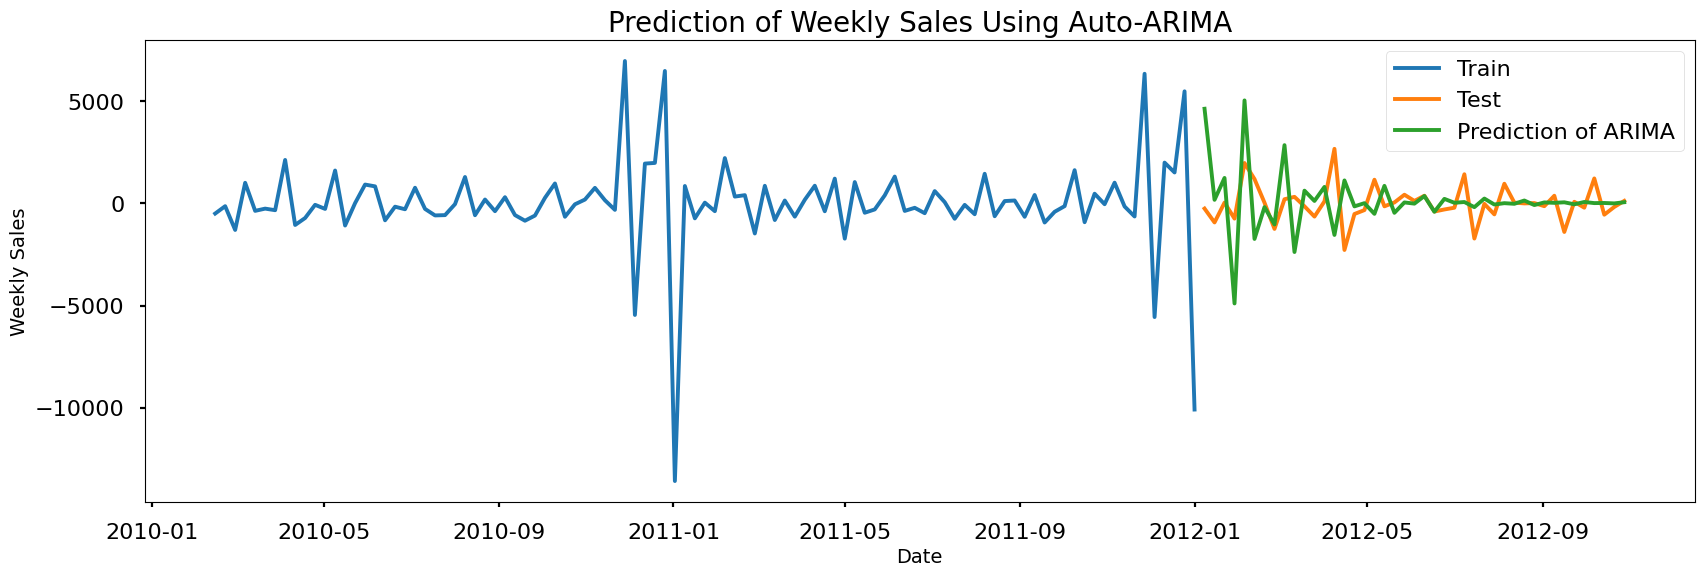

In [71]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

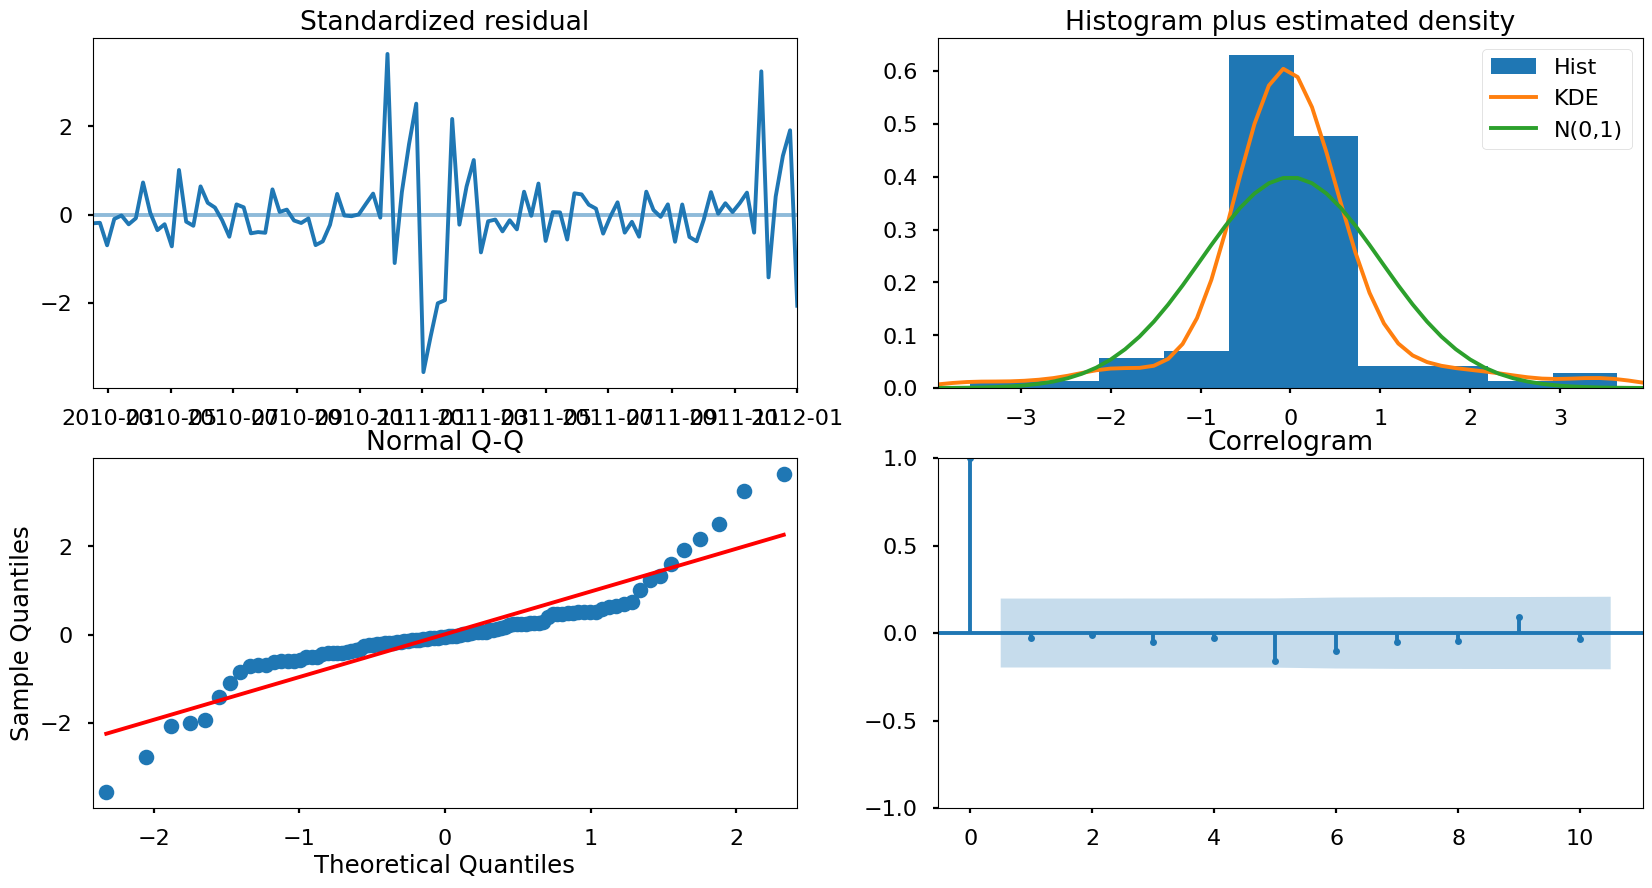

In [72]:
model_auto_arima.plot_diagnostics(figsize=(20,10))
plt.show()


# Exponential Smoothing

Exponential Smooting are used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future.

The difference data has some minus and zero values, so we used additive seasonal and trend instead of multiplicative.

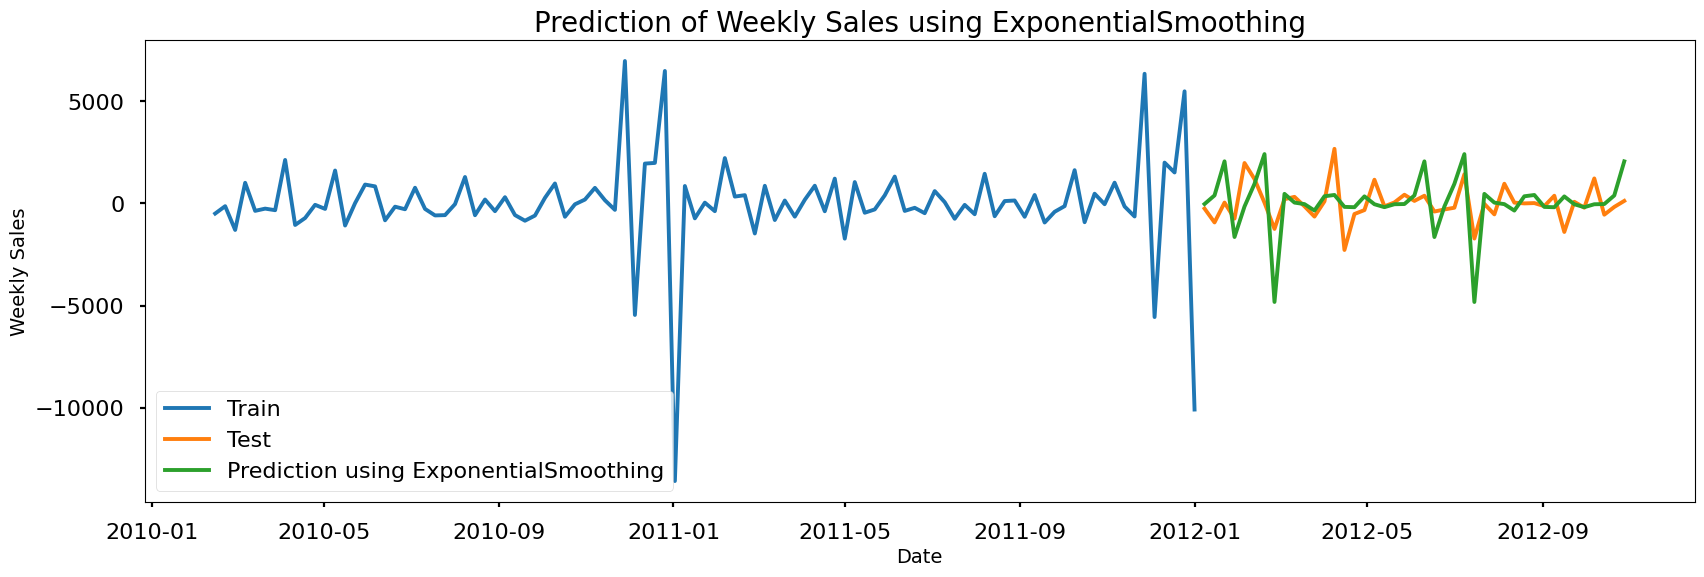

In [73]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [74]:
print(model_holt_winters.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Weekly_Sales   No. Observations:                   99
Model:             ExponentialSmoothing   SSE                      555724840.882
Optimized:                         True   AIC                           1588.526
Trend:                         Additive   BIC                           1653.404
Seasonal:                      Additive   AICC                          1609.822
Seasonal Periods:                    20   Date:                 Tue, 02 Apr 2024
Box-Cox:                          False   Time:                         10:57:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend          

In [75]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(y_pred-test_data_diff)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(test_data_diff.values, y_pred)

{'mape': 5.119535359743998,
 'me': -44.9593525686439,
 'mae': 923.119482259168,
 'mpe': -2.5435897443859585,
 'rmse': 1271.597544923302,
 'acf1': -0.24691925954517022,
 'corr': 0.42869006670889376,
 'minmax': 0.17427359386202712}

Around 5.1% MAPE implies the model is about **94.9%** accurate in predicting the next 15 observations.

In [76]:
def wmae_test(test, pred): # WMAE for test
  weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
  error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
  return error

wmae_test(test_data_diff, y_pred)

840.681060966696

# Model Deployment

In [77]:
from sklearn.preprocessing import FunctionTransformer
## combine processing technqiues
from sklearn.compose import ColumnTransformer
train = df_train.merge(df_store, how='left').merge(df_features, how='left')
test = df_test.merge(df_store, how='left').merge(df_features, how='left')
train.tail(1)

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
421569     45    98  2012-10-26        1076.8      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  
421569     858.33  192.308899         8.667

In [78]:
def extract_week(df):
    Date='Date'
    df[Date] =  pd.to_datetime(df[Date], infer_datetime_format=True)
    df['week'] = pd.DatetimeIndex(df[Date]).week
    df['month'] = pd.DatetimeIndex(df[Date]).month
    df['year'] = pd.DatetimeIndex(df[Date]).year

    return df

In [79]:
# step 2

def maping_type(df):
    # map Type
    df['Type'] = df['Type'].map({'A':'1',
                                 'B':'2',
                                 'C':'3'})
    return df

In [80]:
def convert_to_int(df):
    ## convert them into integer
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df


In [81]:
input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
def input_col_sel(df):
    #df.drop(columns=temp3,inplace=True)
    return df[input_col]

In [82]:
y=train['Weekly_Sales']
extract_week_transform = FunctionTransformer(extract_week)
maping_type_transform = FunctionTransformer(maping_type)
change_to_int_transform = FunctionTransformer(convert_to_int)
input_col_transform = FunctionTransformer(input_col_sel)

In [83]:
pipe = Pipeline(
        steps =[("extract_week",extract_week_transform),
               ("maping_type",maping_type_transform),
               ('convert_to_int',change_to_int_transform),
               ("input_col_transform",input_col_transform),
               ('model',RandomForestRegressor( random_state=42,max_samples=160000
                            ,max_features=6,max_depth=25))])
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [84]:
pipe.fit(train,y)

Pipeline(steps=[('extract_week',
                 FunctionTransformer(func=<function extract_week at 0x798769e3c9d0>)),
                ('maping_type',
                 FunctionTransformer(func=<function maping_type at 0x798769e3cd30>)),
                ('convert_to_int',
                 FunctionTransformer(func=<function convert_to_int at 0x798769e3d090>)),
                ('input_col_transform',
                 FunctionTransformer(func=<function input_col_sel at 0x798769e3d3f0>)),
                ('model',
                 RandomForestRegressor(max_depth=25, max_features=6,
                                       max_samples=160000, random_state=42))])

In [85]:
#lets reload the data

train = df_train.merge(df_store, how='left').merge(df_features, how='left')
test = df_test.merge(df_store, how='left').merge(df_features, how='left')
train_preds=pipe.predict(train)
train_preds

array([25318.1168, 40361.6541, 36006.3848, ...,   796.2911,   815.9115,
         847.3254])

In [86]:
# train_wmae = WMAE(train, y, train_preds)
# print('The WMAE loss for the training set is  {}.'.format(train_wmae))

In [87]:
from joblib import dump, load
dump(pipe,'filename.joblib')
['filename.joblib']
rnd = load('filename.joblib')
train.head(1)

Store  Dept       Date  Weekly_Sales  IsHoliday  Type    Size  Temperature  \
0      1     1 2010-02-05       24924.5          0     1  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  week  month  year  
0  211.096358         8.106     5      2  2010

In [88]:
rnd.predict(test.head(1))

array([32052.1751])

In [89]:
import pickle


pickle.dump(train,open('train.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [90]:
df1 = {
    'Store' : 29,
    'Dept' : 52,
    'Date' : '2012-07-13',
    'IsHoliday':False,
    'Type':'B',
    "Size":93638}

df = pd.DataFrame(df1,index=[0])
pipe2 = pickle.load(open('pipe.pkl','rb'))

In [91]:
pipe2.predict(df)

array([737.7915])

In [92]:
z=train.sample(1)
z

Store  Dept       Date  Weekly_Sales  IsHoliday  Type    Size  \
119826     13    17 2011-07-15       15138.1          0     1  219622   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
119826        75.59       3.553        NaN        NaN        NaN        NaN   

        MarkDown5         CPI  Unemployment  week  month  year  
119826        NaN  129.133839         6.877    28      7  2011

In [93]:
y[z.index]

119826    15138.1
Name: Weekly_Sales, dtype: float64

In [94]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [95]:
%%writefile app.py
import streamlit as st
import pickle
import datetime
import pandas as pd

def extract_week(df):
    Date='Date'
    df[Date] =  pd.to_datetime(df[Date], infer_datetime_format=True)
    df['week'] = pd.DatetimeIndex(df[Date]).week
    df['month'] = pd.DatetimeIndex(df[Date]).month
    df['year'] = pd.DatetimeIndex(df[Date]).year

    return df

def maping_type(df):
    # map Type
    df['Type'] = df['Type'].map({'A':'1',
                                 'B':'2',
                                 'C':'3'})
    return df

def convert_to_int(df):
    ## convert them into integer
    df['Type']=df['Type'].astype(int)
    df['IsHoliday']=df['IsHoliday'].astype(int)
    return df

input_col = ['Store', 'IsHoliday', 'Type', 'Size', 'week','Dept','year']
def input_col_sel(df):
    #df.drop(columns=temp3,inplace=True)
    return df[input_col]

pipe = pickle.load(open('pipe.pkl','rb'))
df = pickle.load(open('train.pkl','rb'))

st.title("Walmart Sales Predictor")

store = st.selectbox('Store',df['Store'].unique())
Dept = st.selectbox('Dept',df['Dept'].unique())
Date =st.date_input( "When to predict", datetime.date(2011,11,11), datetime.date(2010,2,5), datetime.date(2012,10,26) )
IsHoliday = st.selectbox('IsHoliday',[True,False])
Type = st.selectbox('Type',["A","B","C"])
Size = st.number_input("Size" )

if
st.button("Predict Sales Amount"): query = pd.DataFrame({"Store":store,'Dept':Dept,'Date':Date,'IsHoliday':IsHoliday,'Type':Type,'Size':Size}, index=[0])
st.title(pipe.predict(query))


Writing app.py


In [96]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.724s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [97]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.86.56.153


In [98]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

npx: installed 22 in 1.794s
your url is: https://afraid-glasses-visit.loca.lt
^C
